## Exploratory Data Analysis part 1 - Parsing through sales data

### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas, MatPlotLib, and MySQL Connector Python libraries:


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.linear_model import LinearRegression

### As a Data Analyst, I want to use MySQL Connector to establish a connection to my remote data source:

In [60]:
mydb = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com",
database="salesdb",
user="root",
password="D3v$tudent",
use_pure=True)


### As a Data Analyst, I want to query my database to JOIN the information from the sales and cities tables together, and save the result as a single DataFrame variable

In [61]:
joinQuery = "SELECT Invoice_ID, Customer_Type, Gender, Product_Line, Unit_Price, Quantity, Total, Date, Time, Payment, COGS, Gross_Income, Rating, City FROM sales LEFT JOIN cities ON cities.City_ID= sales.City_ID"
df = pd.read_sql_query(joinQuery, mydb, index_col="Invoice_ID")

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/4208025678.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(joinQuery, mydb, index_col="Invoice_ID")


### As a Data Analyst, I want to perform the necessary data cleaning and wrangling steps for my DataFrame.  This will include:

### Exploring the information of the joined DataFrame
### Checking for and removing null values, if necessary - Not necessary
### Checking for and removing duplicate rows, if necessary - Not necessary

In [62]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 101-17-6199 to 898-04-2717
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  1000 non-null   object 
 1   Gender         1000 non-null   object 
 2   Product_Line   1000 non-null   object 
 3   Unit_Price     1000 non-null   float64
 4   Quantity       1000 non-null   int64  
 5   Total          1000 non-null   float64
 6   Date           1000 non-null   object 
 7   Time           1000 non-null   object 
 8   Payment        1000 non-null   object 
 9   COGS           1000 non-null   float64
 10  Gross_Income   1000 non-null   float64
 11  Rating         1000 non-null   float64
 12  City           1000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 109.4+ KB


,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
Invoice_ID,,,,,,,,,,,,,
101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,Seattle
101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,Milwaukee
102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894-41-5205,Normal,Female,Food and beverages,43.18,8,362.7120,1/19/2019,19:39,Credit card,345.44,17.2720,8.3,Milwaukee
895-03-6665,Normal,Female,Fashion accessories,36.51,9,345.0195,2/16/2019,10:52,Cash,328.59,16.4295,4.2,New York City
895-66-0685,Member,Male,Food and beverages,18.08,3,56.9520,3/5/2019,19:46,Ewallet,54.24,2.7120,8.0,New York City


In [63]:
df.duplicated().sort_values()

Invoice_ID
101-17-6199    False
633-91-1052    False
634-97-8956    False
635-28-5728    False
635-40-6220    False
               ...  
373-73-7910    False
373-88-1424    False
374-17-3652    False
366-43-6862    False
898-04-2717    False
Length: 1000, dtype: bool

### Converting any necessary columns to Pandas DateTime format

In [64]:
df["Date"] = pd.to_datetime(df['Date'])
df["Time"] = pd.to_datetime(df['Time'])
df["Time"] = df["Time"].dt.hour
df

,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
Invoice_ID,,,,,,,,,,,,,
101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,19,Credit card,320.53,16.0265,7.0,Seattle
101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,12,Ewallet,125.64,6.2820,4.9,Milwaukee
102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,2019-03-20,17,Cash,126.25,6.3125,6.1,Milwaukee
102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,2019-03-05,18,Credit card,457.17,22.8585,4.2,Milwaukee
105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2019-02-27,12,Ewallet,42.96,2.1480,6.6,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894-41-5205,Normal,Female,Food and beverages,43.18,8,362.7120,2019-01-19,19,Credit card,345.44,17.2720,8.3,Milwaukee
895-03-6665,Normal,Female,Fashion accessories,36.51,9,345.0195,2019-02-16,10,Cash,328.59,16.4295,4.2,New York City
895-66-0685,Member,Male,Food and beverages,18.08,3,56.9520,2019-03-05,19,Ewallet,54.24,2.7120,8.0,New York City


### As a Data Analyst, I want to explore my DataFrame to examine the spread of values across categories.  I will utilize this exploration to answer the following questions:

### How many sales were made for members vs. normal customers?

In [65]:
customer_type_query =  "SELECT Customer_Type, COUNT(Customer_Type) FROM sales GROUP BY Customer_Type"
pd.read_sql_query(customer_type_query, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/4232727294.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(customer_type_query, mydb)


,Customer_Type,COUNT(Customer_Type)
0,Normal,499
1,Member,501


### How many sales were made at each store location?

In [66]:
df['City'].value_counts()

Seattle          340
New York City    332
Milwaukee        328
Name: City, dtype: int64

### How many sales were made for each product line?

In [67]:
count_product_line = "SELECT Product_Line, COUNT(Product_Line) FROM sales GROUP BY Product_Line ORDER BY COUNT(Product_Line) DESC"
pd.read_sql_query(count_product_line, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/2745008305.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(count_product_line, mydb)


,Product_Line,COUNT(Product_Line)
0,Fashion accessories,178
1,Food and beverages,174
2,Electronic accessories,170
3,Sports and travel,166
4,Home and lifestyle,160
5,Health and beauty,152


### Sum of Gross_Income by Product Line

In [74]:
total_profit_by_product_line = "SELECT Product_Line, SUM(Gross_Income) FROM sales GROUP BY Product_Line ORDER BY SUM(Gross_Income) DESC"
pd.read_sql(total_profit_by_product_line, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/2391727545.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(total_profit_by_product_line, mydb)


,Product_Line,SUM(Gross_Income)
0,Food and beverages,2673.5640
1,Sports and travel,2624.8965
2,Electronic accessories,2587.5015
3,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
5,Health and beauty,2342.5590


### Finding profit per item sold

In [81]:
profit_factor_query = "SELECT Product_Line, SUM(Gross_Income) / SUM(Quantity) AS Profit_Per_Item FROM sales GROUP BY Product_Line ORDER BY Profit_Per_Item DESC"
pd.read_sql(profit_factor_query, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/2669913609.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(profit_factor_query, mydb)


,Product_Line,Profit_Per_Item
0,Fashion accessories,2.866957
1,Sports and travel,2.853148
2,Home and lifestyle,2.815426
3,Food and beverages,2.808366
4,Health and beauty,2.743043
5,Electronic accessories,2.664780


### What is the overall average rating, based on all sales records?

In [ ]:
df['Rating'].mean()

6.9727

## Analysis of type of payment type used in realtion to customer type, gender, product line, and avg sale total:

### Average total sale by payment type

In [ ]:
avg_sale_query = 'SELECT Payment, AVG(Total) FROM sales GROUP BY Payment ORDER BY AVG(Total) DESC'
pd.read_sql(avg_sale_query, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/3263753507.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(avg_sale_query, mydb)


,Payment,AVG(Total)
0,Cash,326.181890
1,Credit card,324.009878
2,Ewallet,318.820600


### Count of payment type by membership

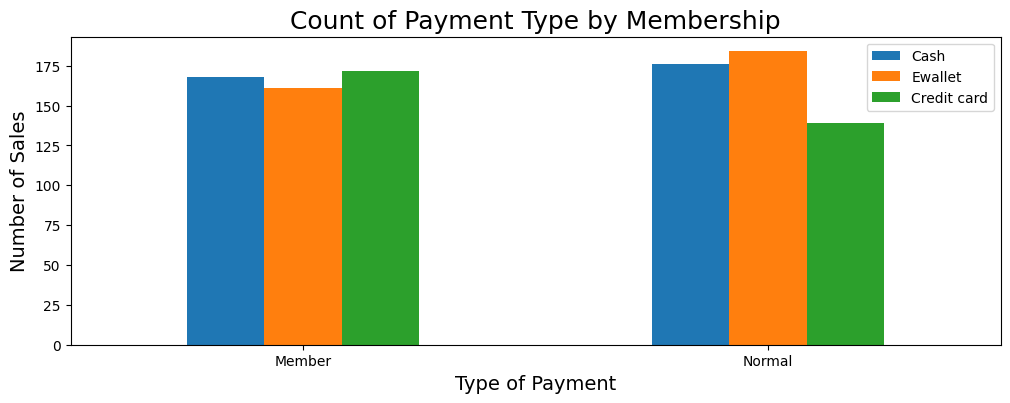

In [ ]:
customer_type_cash_counts = df[df["Payment"] == "Cash"]["Customer_Type"].value_counts()
customer_type_Ewallet_counts = df[df["Payment"] == "Ewallet"]["Customer_Type"].value_counts()
customer_type_Credit_card_counts = df[df["Payment"] == "Credit card"]["Customer_Type"].value_counts()
payment_membership_df = pd.DataFrame({'Cash': customer_type_cash_counts, 'Ewallet': customer_type_Ewallet_counts, 'Credit card': customer_type_Credit_card_counts})
payment_membership_df.plot.bar(figsize=(12,4))
plt.title('Count of Payment Type by Membership', fontsize=18)
plt.xlabel('Type of Payment', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(fontsize=10, rotation='horizontal');

### Wallet type vs Gender

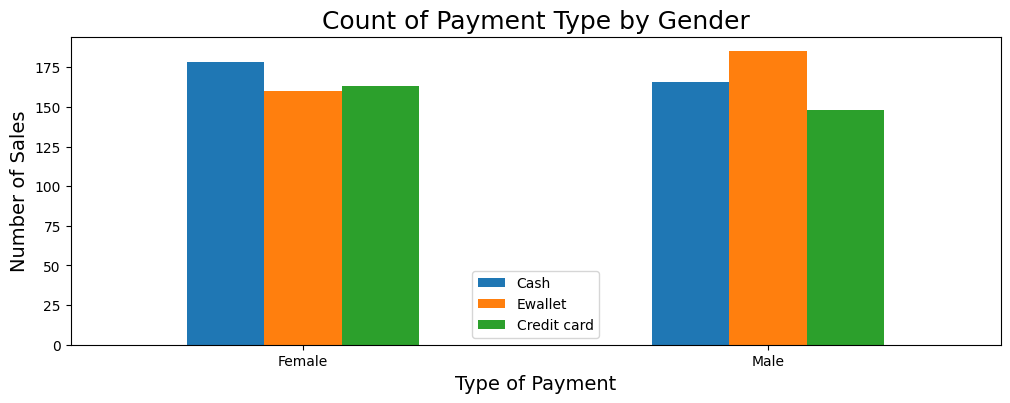

In [82]:
gender_cash_counts = df[df["Payment"] == "Cash"]["Gender"].value_counts()
gender_Ewallet_counts = df[df["Payment"] == "Ewallet"]["Gender"].value_counts()
gender_Credit_card_counts = df[df["Payment"] == "Credit card"]["Gender"].value_counts()
payment_gender_df = pd.DataFrame({'Cash': gender_cash_counts, 'Ewallet': gender_Ewallet_counts, 'Credit card': gender_Credit_card_counts})
payment_gender_df.plot.bar(figsize=(12,4))
plt.title('Count of Payment Type by Gender', fontsize=18)
plt.xlabel('Type of Payment', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(fontsize=10, rotation='horizontal');

### Wallet type by product line

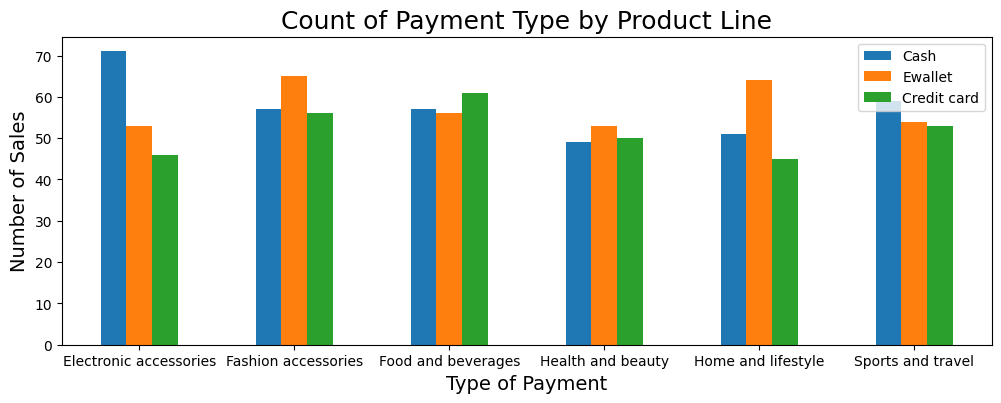

In [83]:
product_line_cash_counts = df[df["Payment"] == "Cash"]["Product_Line"].value_counts()
product_line_Ewallet_counts = df[df["Payment"] == "Ewallet"]["Product_Line"].value_counts()
product_line_Credit_card_counts = df[df["Payment"] == "Credit card"]["Product_Line"].value_counts()
payment_product_line_df = pd.DataFrame({'Cash': product_line_cash_counts, 'Ewallet': product_line_Ewallet_counts, 'Credit card': product_line_Credit_card_counts})
payment_product_line_df.plot.bar(figsize=(12,4))
plt.title('Count of Payment Type by Product Line', fontsize=18)
plt.xlabel('Type of Payment', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(fontsize=10, rotation='horizontal');

# Part 2

Describe the DF using SKlearn

In [ ]:
df.describe()

,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000


figure out correlation between numerical values

In [ ]:
df.corr()

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
Unit_Price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
COGS,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Gross_Income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000


Analyze correlation between Gross_Income and Quantity

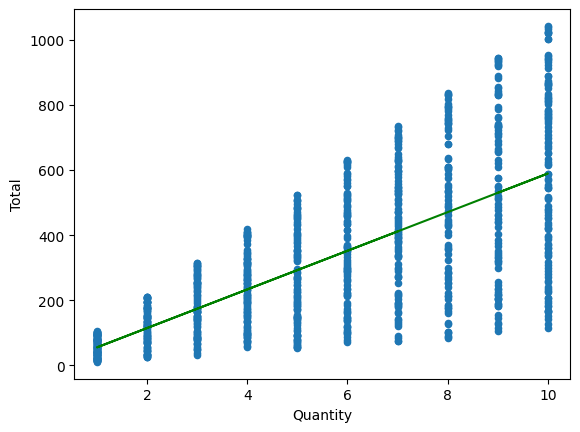

In [85]:
df.plot.scatter(x = 'Quantity', y = 'Total')
reshaped_x = df[['Quantity']]
reshaped_y = df['Total']
linear_regressor = LinearRegression()
linear_regressor.fit(reshaped_x, reshaped_y)
y_prediction = linear_regressor.predict(reshaped_x)
plt.plot(reshaped_x, y_prediction, color = 'green')

## Extra queries and code ran for practice and data set exploration:

Count of Genders:

In [ ]:
gender_query = "SELECT Gender, COUNT(Gender) FROM sales GROUP BY Gender"
pd.read_sql_query(gender_query, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/258538062.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(gender_query, mydb)


,Gender,COUNT(Gender)
0,Male,499
1,Female,501


Count of Male members and non members:

In [ ]:
male_member_or_not = "SELECT Customer_Type, COUNT(Customer_Type) FROM sales  WHERE Gender = 'Male' GROUP BY Customer_Type"
pd.read_sql_query(male_member_or_not, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/4173558842.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(male_member_or_not, mydb)


,Customer_Type,COUNT(Customer_Type)
0,Normal,259
1,Member,240


Count of Female members and non members:

In [ ]:
female_member_or_not = "SELECT Customer_Type, COUNT(Customer_Type) FROM sales  WHERE Gender = 'Female' GROUP BY Customer_Type"
pd.read_sql_query(female_member_or_not, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/3442620490.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(female_member_or_not, mydb)


,Customer_Type,COUNT(Customer_Type)
0,Member,261
1,Normal,240


Count Product Line for each Gender:

In [ ]:
male_product_line = "SELECT Product_Line, COUNT(Product_Line) FROM sales WHERE Gender = 'Male' GROUP BY Product_Line ORDER BY COUNT(Product_Line) DESC"
pd.read_sql_query(male_product_line, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/3857675583.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(male_product_line, mydb)


,Product_Line,COUNT(Product_Line)
0,Health and beauty,88
1,Electronic accessories,86
2,Food and beverages,84
3,Fashion accessories,82
4,Home and lifestyle,81
5,Sports and travel,78


In [ ]:
female_product_line = "SELECT Product_Line, COUNT(Product_Line) FROM sales WHERE Gender = 'Female' GROUP BY Product_Line ORDER BY COUNT(Product_Line) DESC"
pd.read_sql_query(female_product_line, mydb)

/var/folders/rm/mv7gy4x909jbmc6khtg2gp180000gn/T/ipykernel_58034/1105394206.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(female_product_line, mydb)


,Product_Line,COUNT(Product_Line)
0,Fashion accessories,96
1,Food and beverages,90
2,Sports and travel,88
3,Electronic accessories,84
4,Home and lifestyle,79
5,Health and beauty,64
